# Population and Peace factor

In [15]:
%matplotlib inline

import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/Global_Peace_Index')

In [3]:
countries = df[1][['Country','2019 rank',"2019 score[12]"]].set_index('Country')

In [4]:
df = pd.read_html('https://www.worldometers.info/world-population/population-by-country/')

In [5]:
df = df[0][["Country (or dependency)", 'Population (2019)', 'Density (P/Km²)']].set_index(['Country (or dependency)'])

In [6]:
df

,Population (2019),Density (P/Km²)
Country (or dependency),,
China,1433783686,153
India,1366417754,460
United States,329064917,36
Indonesia,270625568,149
Pakistan,216565318,281
...,...,...
Montserrat,4989,50
Falkland Islands,3377,0
Niue,1615,6


In [7]:
countries = countries.join(df)

In [12]:
countries

,2019 rank,2019 score[12],Population (2019),Density (P/Km²)
Country,,,,
Iceland,1,1.072,339031.0,3.0
New Zealand,2,1.221,4783063.0,18.0
Portugal,3,1.274,10226187.0,112.0
Austria,4,1.291,8955102.0,109.0
Denmark,5,1.316,5771876.0,136.0
...,...,...,...,...
Iraq,159,3.369,39309783.0,91.0
Yemen,160,3.412,29161922.0,55.0
Syria,161,3.526,17070135.0,93.0


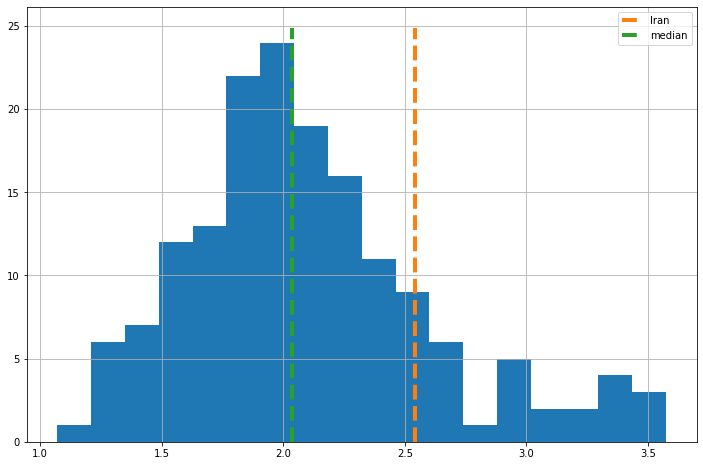

In [71]:
plt.figure(figsize=(12,8))
countries['2019 score[12]'].hist(bins=18)
plt.plot([Iran['2019 score[12]'],Iran['2019 score[12]']],[0, 24.9], linestyle='--', label='Iran', linewidth=4)
plt.plot([median,median],[0, 24.9], linestyle='--', label='median', linewidth=4)
plt.legend()

In [59]:
mean, median, std =  countries['2019 score[12]'].mean(), countries['2019 score[12]'].median(), countries['2019 score[12]'].std()

In [60]:
mean, median, std

(2.099748466257669, 2.035, 0.5112437671274297)

## Iran

In [30]:
Iran = countries.loc['Iran']

In [31]:
Iran

2019 rank                    139
2019 score[12]             2.542
Population (2019)    8.29139e+07
Density (P/Km²)               51
Name: Iran, dtype: object

## Countries with more than 70M population

In [32]:
countries[(countries['Population (2019)'] > 7e7)]

,2019 rank,2019 score[12],Population (2019),Density (P/Km²)
Country,,,,
Japan,9,1.369,1.268603e+08,348.0
Germany,22,1.547,8.351704e+07,240.0
Indonesia,41,1.785,2.706256e+08,149.0
Vietnam,57,1.877,9.646211e+07,311.0
Bangladesh,101,2.128,1.630462e+08,1253.0
China,110,2.217,1.433784e+09,153.0
Brazil,116,2.271,2.110495e+08,25.0
United States,128,2.401,3.290649e+08,36.0
Ethiopia,131,2.434,1.120787e+08,112.0


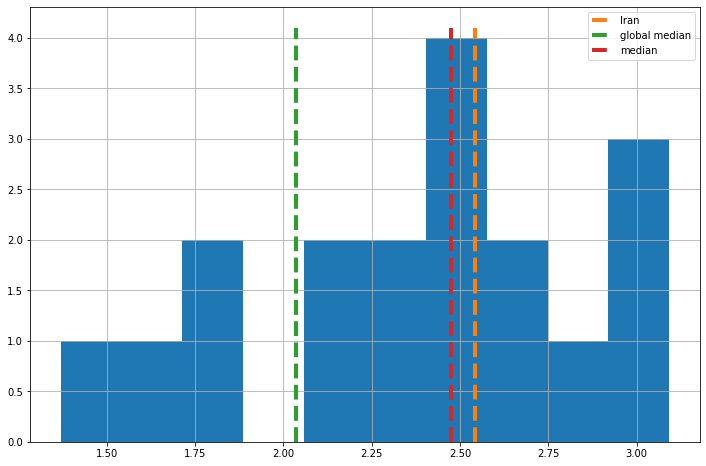

In [79]:
plt.figure(figsize=(12,8))
countries[(countries['Population (2019)'] > 7e7)]['2019 score[12]'].hist(bins=10)
plt.plot([Iran['2019 score[12]'],Iran['2019 score[12]']],[0, 4.1], linestyle='--', label='Iran', linewidth=4)
plt.plot([median,median],[0, 4.1], linestyle='--', label='global median', linewidth=4)
median_ = countries[(countries['Population (2019)'] > 7e7)]['2019 score[12]'].median()
plt.plot([median_,median_],[0, 4.1], linestyle='--', label='median', linewidth=4)
plt.legend()

## Countries with more than density of 50 person per $km^2$

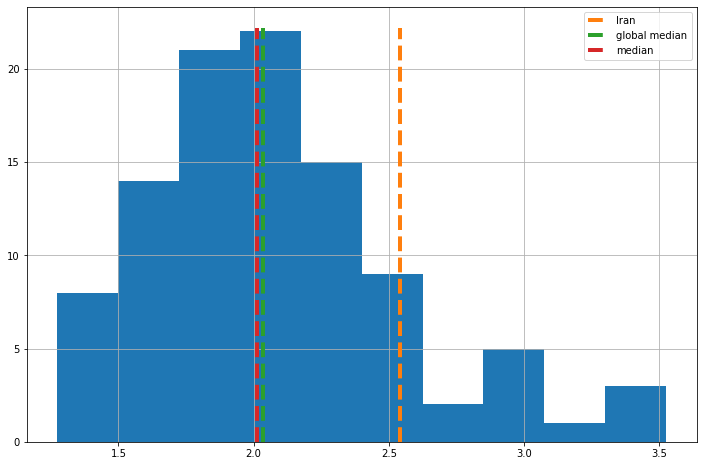

In [85]:
plt.figure(figsize=(12,8))
countries[(countries['Density (P/Km²)'] > 50)]['2019 score[12]'].hist(bins=10)
plt.plot([Iran['2019 score[12]'],Iran['2019 score[12]']],[0, 22.2], linestyle='--', label='Iran', linewidth=4)
plt.plot([median,median],[0, 22.2], linestyle='--', label='global median', linewidth=4)
median_ = countries[(countries['Density (P/Km²)'] >= 50)]['2019 score[12]'].median()
plt.plot([median_,median_],[0, 22.2], linestyle='--', label='median', linewidth=4)
plt.legend()

## Countries with more than density of 50 person per $km^2$ and population on 70M

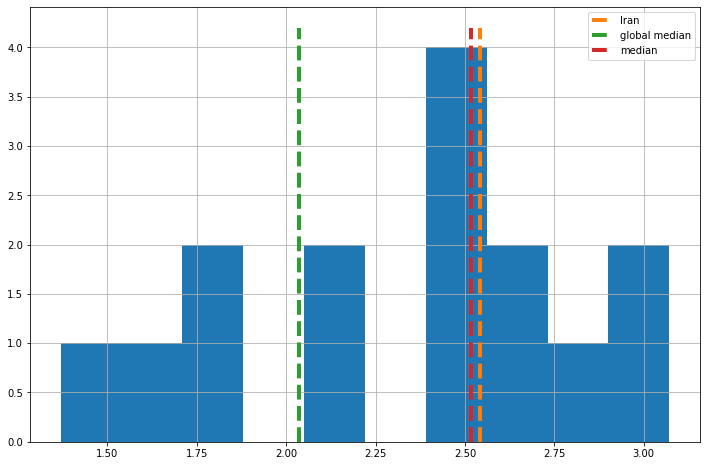

In [86]:
plt.figure(figsize=(12,8))
countries[(countries['Population (2019)'] > 7e7)&(countries['Density (P/Km²)'] > 50)]['2019 score[12]'].hist(bins=10)
plt.plot([Iran['2019 score[12]'],Iran['2019 score[12]']],[0, 4.2], linestyle='--', label='Iran', linewidth=4)
plt.plot([median,median],[0, 4.2], linestyle='--', label='global median', linewidth=4)
median_ = countries[(countries['Population (2019)'] > 7e7)&(countries['Density (P/Km²)'] >= 50)]['2019 score[12]'].median()
plt.plot([median_,median_],[0, 4.2], linestyle='--', label='median', linewidth=4)
plt.legend()

# Conclusion

There is correlation visible between population and peace index in countries, the density also doesn't show any direct impact in peace index.